<a href="https://colab.research.google.com/github/CatIsVeryFat/Astronomy/blob/main/Project_Astronomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd

In [ ]:
Orig = fits.open('/content/normal7')
Smoo = fits.open('/content/smooth7')

In [ ]:
print(Orig)

In [ ]:
Orig[0].header

In [ ]:
Orig.info()

Filename: /content/normal7
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (1920, 733)   float32   


In [ ]:
Orig_data = Orig[0].data
print(Orig_data.shape)

Smoo_data = Smoo[0].data
print(Smoo_data.shape)

(733, 1920)
(733, 1920)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


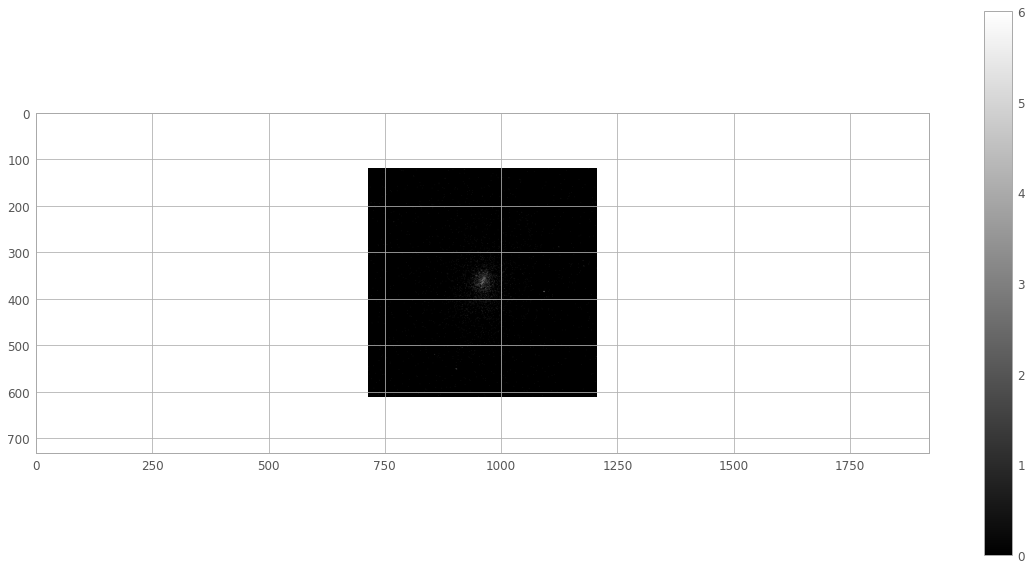

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(Orig_data, cmap='gray')
plt.colorbar()

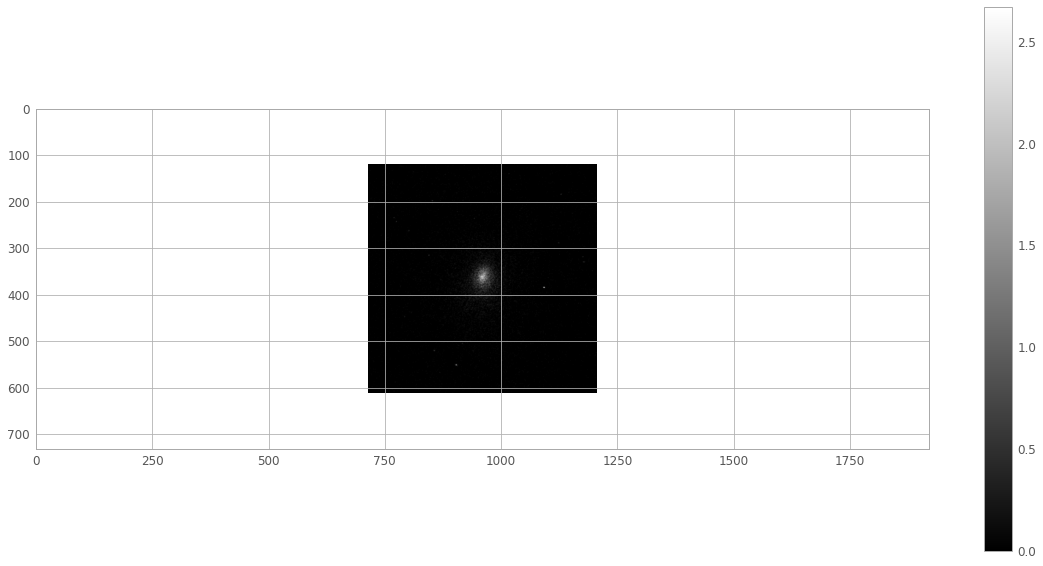

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(Smoo_data, cmap='gray')
plt.colorbar()

In [ ]:
Subt = Orig_data - Smoo_data

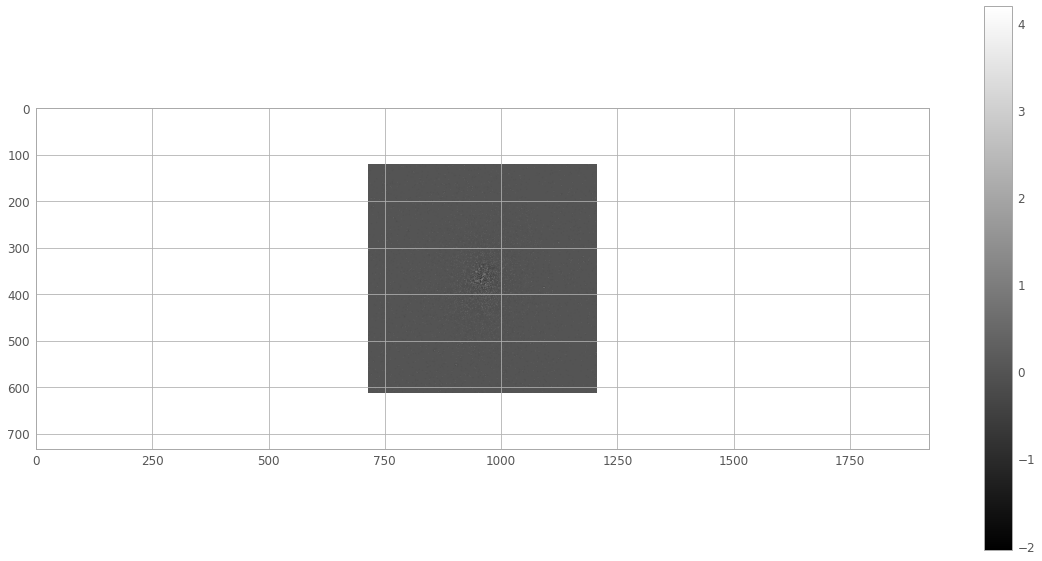

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(Subt, cmap='gray')
plt.colorbar()

In [ ]:
hdu = fits.PrimaryHDU(Subt)
hdul = fits.HDUList([hdu])
hdul.writeto('substractedrxc2211.fits')

In [ ]:
Pic_data.item((731, 36))

8

In [ ]:
def find_ind(array, center, radius):
  a = np.indices(array.shape).reshape(2,-1).T
  return a[np.abs(a-np.array(center)).sum(1)<=int(radius)]-np.array(center)

find_ind(Pic_data,[731,36],2)

array([[-2,  0],
       [-1, -1],
       [-1,  0],
       [-1,  1],
       [ 0, -2],
       [ 0, -1],
       [ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 1, -1],
       [ 1,  0],
       [ 1,  1],
       [ 2,  0]])

In [62]:
df = pd.read_excel("/content/graph2.xlsx")
Redshift = df["Red"].values
Angular = df["Ang"].values
Distance = df["Dist"].values

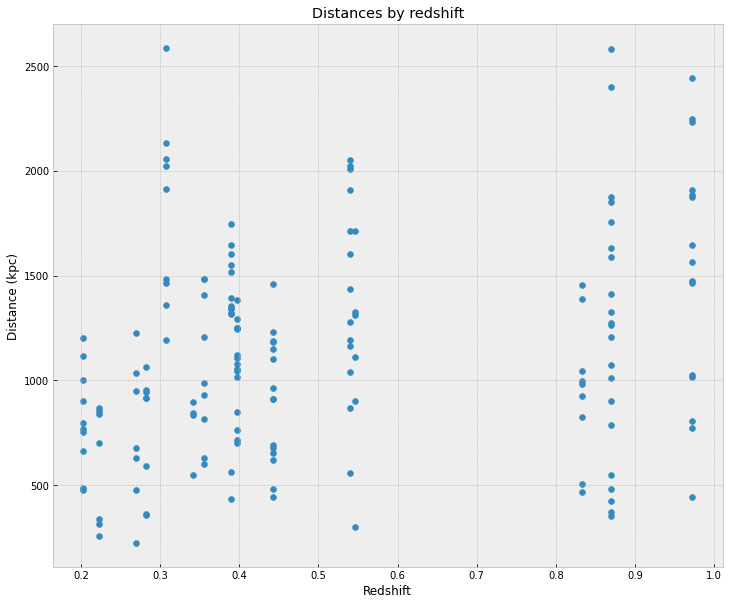

In [63]:
plt.figure(figsize=(12,10))
plt.title("Distances by redshift")
plt.xlabel("Redshift")
plt.ylabel("Distance (kpc)")
plt.scatter(Redshift, Distance)

(0.0, 20.0)

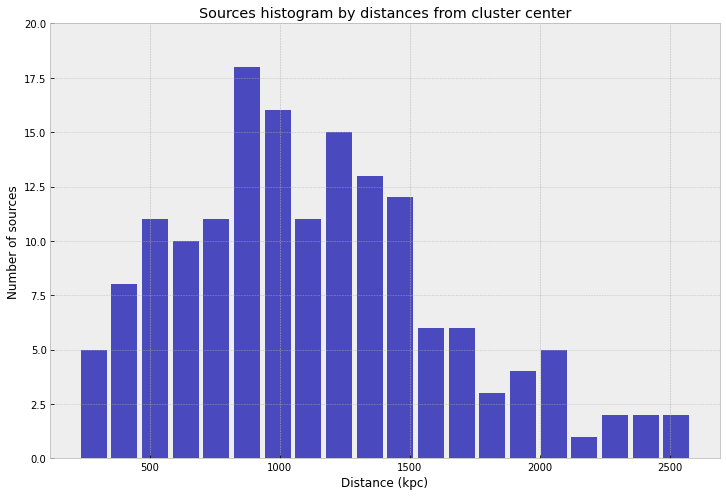

In [64]:
# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=Distance, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distance (kpc)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


In [ ]:
print(bins)
print(n)

In [65]:
area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

In [ ]:
print(bins)
print(area)

In [66]:
area1 = area[1:]
print(area1)

[ 210725.94292735  298155.76440069  385585.58587404  473015.40734738
  560445.22882073  647875.05029408  735304.87176742  822734.69324077
  910164.51471412  997594.33618746 1085024.15766081 1172453.97913415
 1259883.8006075  1347313.62208085 1434743.44355419 1522173.26502754
 1609603.08650089 1697032.90797422 1784462.72944758 1871892.55092092]


In [67]:
density = n/area1
print(density)

[2.37275009e-05 2.68316127e-05 2.85280374e-05 2.11409604e-05
 1.96272525e-05 2.77831350e-05 2.17596818e-05 1.33700452e-05
 1.64805370e-05 1.30313490e-05 1.10596616e-05 5.11747165e-06
 4.76234395e-06 2.22665306e-06 2.78795489e-06 3.28477718e-06
 6.21271174e-07 1.17852753e-06 1.12078553e-06 1.06843739e-06]


Text(0.5, 1.0, 'Sources density by distances from cluster center')

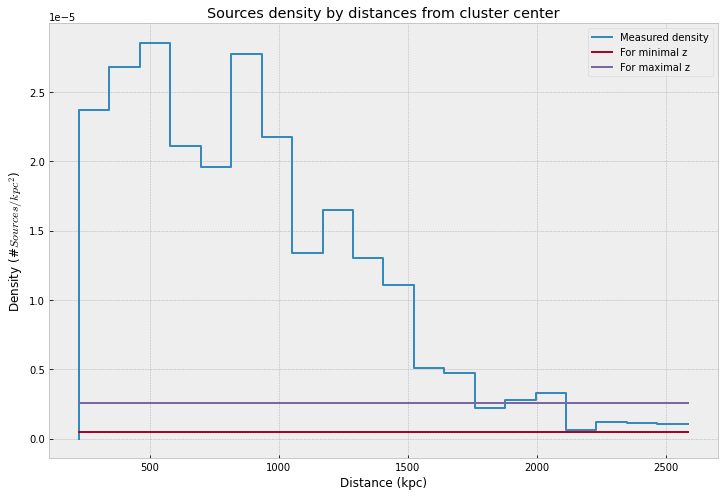

In [68]:
density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.style.use('bmh')
d_min = np.ones(21) * 0.0486 * 10**(-5)
d_max = np.ones(21) * 0.2583* 10**(-5)
plt.step(bins, density1, label='Measured density')
plt.step(bins, d_min, label='For minimal z')
plt.step(bins, d_max, label='For maximal z')
plt.legend()
plt.xlabel('Distance (kpc)')
plt.ylabel('Density (#$Sources/kpc^2$)')
plt.title('Sources density by distances from cluster center')


In [69]:
d_av = (d_min + d_max)/2
subs = density1 - d_av
divi = density1 / d_av
print("sub:", subs)
print("div:", divi)

sub: [-1.53450000e-06  2.21930009e-05  2.52971127e-05  2.69935374e-05
  1.96064604e-05  1.80927525e-05  2.62486350e-05  2.02251818e-05
  1.18355452e-05  1.49460370e-05  1.14968490e-05  9.52516159e-06
  3.58297165e-06  3.22784395e-06  6.92153060e-07  1.25345489e-06
  1.75027718e-06 -9.13228826e-07 -3.55972471e-07 -4.13714473e-07
 -4.66062605e-07]
div: [ 0.         15.46269202 17.48557362 18.59109636 13.7771003  12.79065003
 18.10565984 14.18030743  8.71296524 10.74000459  8.49224441  7.20733893
  3.33494405  3.10351512  1.45106097  1.81684907  2.14061725  0.4048688
  0.76802055  0.73039135  0.69627722]


(0.6, 1.1)

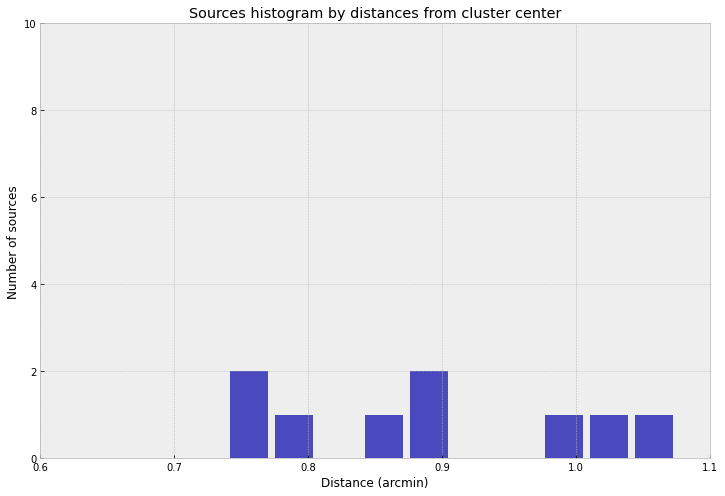

In [84]:
# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=Angular, bins=250, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(0.6,1.1)

Text(0.5, 1.0, 'Sources density by distances from cluster center')

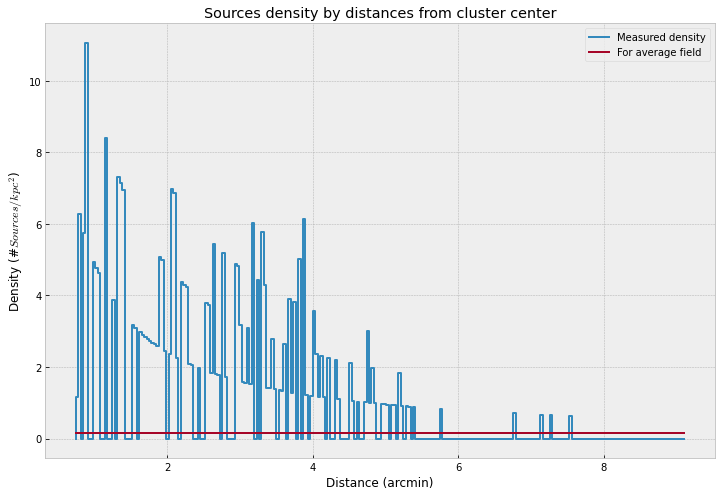

In [88]:
area = np.zeros(249)

for i in range (249):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n[0:249]/area
density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.style.use('bmh')
d_average = np.ones(250) * 0.1534
plt.step(bins[:250], density1, label='Measured density')
plt.step(bins[:250], d_average, label='For average field')
plt.legend()
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#$Sources/kpc^2$)')
plt.title('Sources density by distances from cluster center')

In [94]:
print(bins[0:8])
div = density1[0:8] / d_average[0:8]
print("div:", div)

[0.73889   0.7725046 0.8061192 0.8397338 0.8733484 0.906963  0.9405776
 0.9741922]
div: [ 0.          7.60142799 40.84312408  0.         37.50643416 72.06901944
  0.          0.        ]


In [ ]:
cluster = pd.read_excel("/content/a1300 cluster.xlsx")
parallel = pd.read_excel("/content/a1300 parallel.xlsx")

xc = cluster["x"]
yc = cluster["y"]
xp = parallel["x"]
yp = parallel["y"]

In [ ]:
type(xc)

pandas.core.series.Series

In [ ]:
import math

rx = 2546.8
ry = 2228.2
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

In [ ]:
print(radius)

[0.21736574333827266, 0.1913455692980633, 2.492457593167435, 2.480714636344334, 2.4887806156889365, 2.474839673360681, 2.469378464284485, 2.4555247072397783, 2.377754747841964, 2.4007363686689964, 2.4486492595300375, 2.4361684069809297, 2.4098598205424726, 2.4074825397514306, 2.323650686478069, 2.327775562519076, 2.3283863298086933, 2.3270041998176536, 2.3283435760458553, 2.4005937490606364, 2.4327711563466057, 2.4058291578482875, 2.398406127641439, 2.393727150430683, 2.4102606897887626, 2.406143894298926, 2.395234448236331, 2.398211530939879, 2.3970465771699137, 2.3931307908365564, 2.386360383186496, 2.367695312446473, 2.1952901421657236, 2.2125734576237233, 2.3795025958939404, 2.3727817033401957, 2.3654969140138395, 2.3692878950984406, 2.2621427733766057, 2.2280929159873475, 2.371048938718895, 2.3697489853421185, 2.208551968798788, 2.3574642490135456, 2.3365513368331974, 2.113491667380073, 2.203631666184256, 2.33581605466398, 2.340429830744772, 2.134161408119826, 2.336185961301026, 2

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

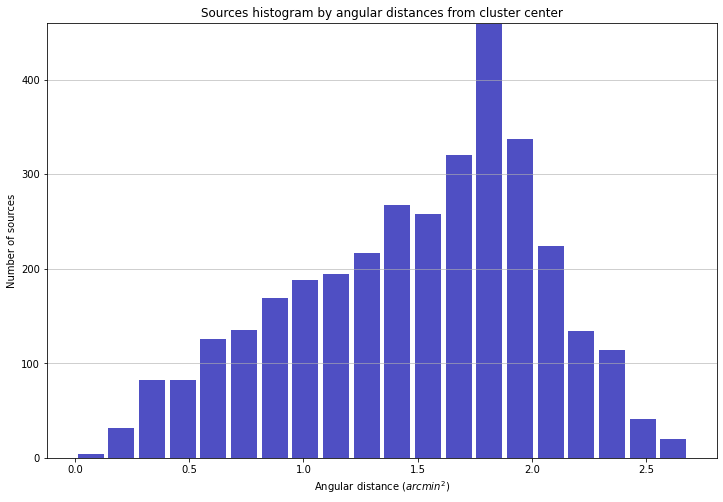

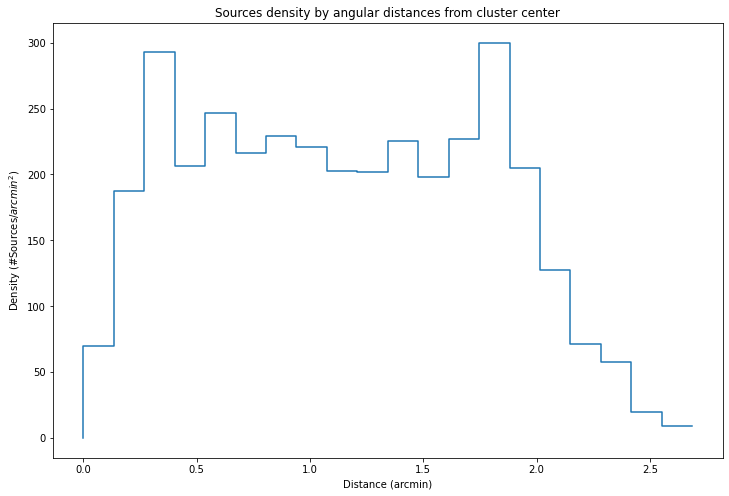

In [ ]:
# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

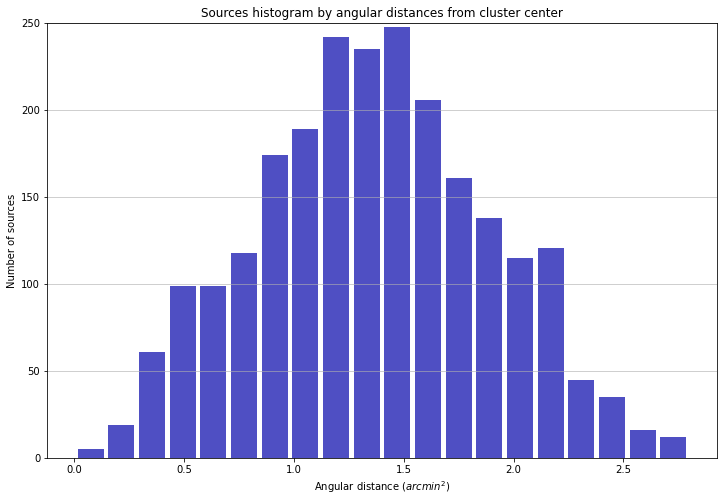

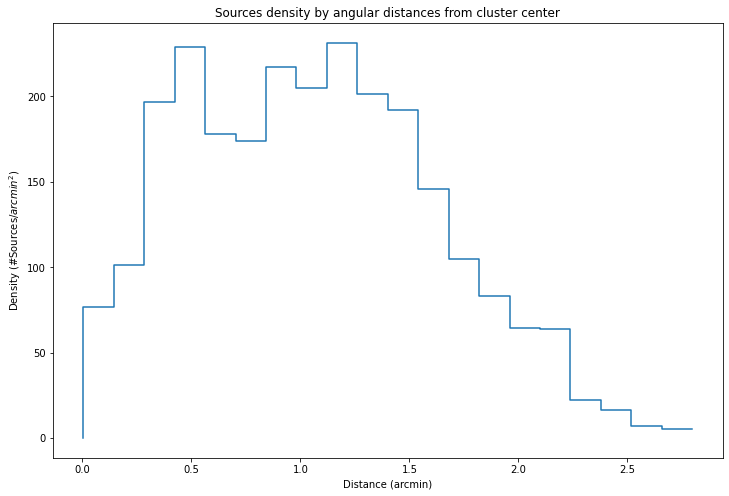

In [ ]:
cluster = pd.read_excel("/content/A697 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

rx = 2838.2
ry = 2638.7
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

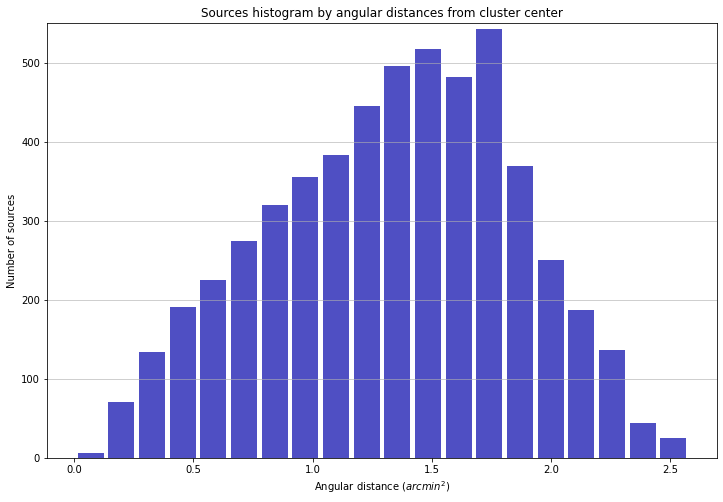

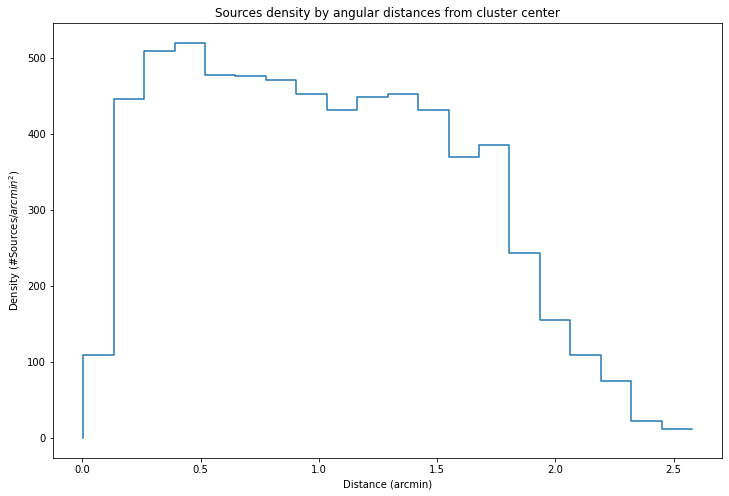

In [ ]:
cluster = pd.read_excel("/content/PLCKG00419 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

rx = 2466.2
ry = 2583.8
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

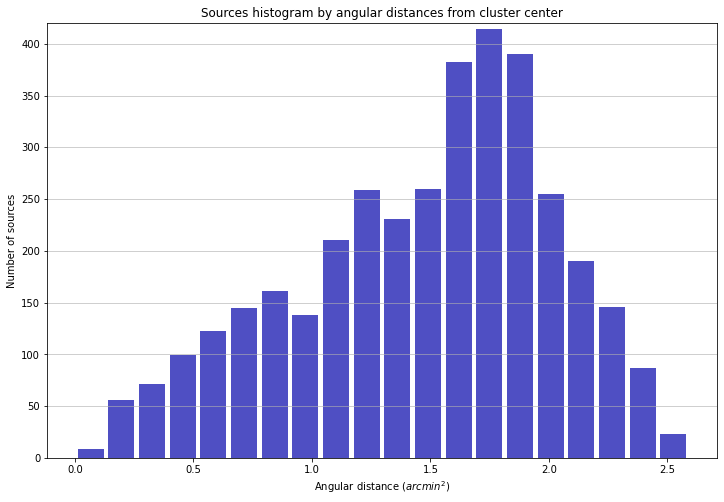

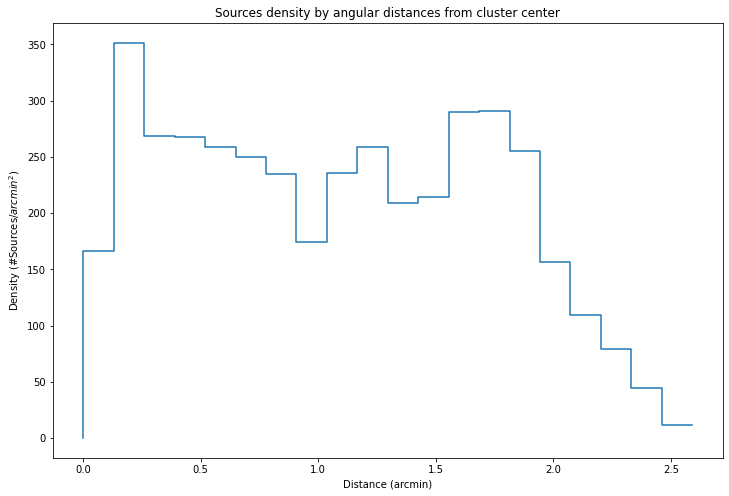

In [ ]:
cluster = pd.read_excel("/content/PLCKG13810 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

rx = 2431.5
ry = 2503.9
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

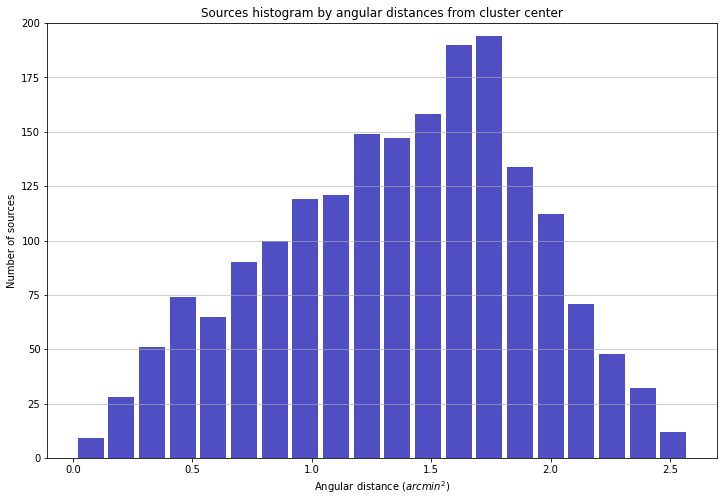

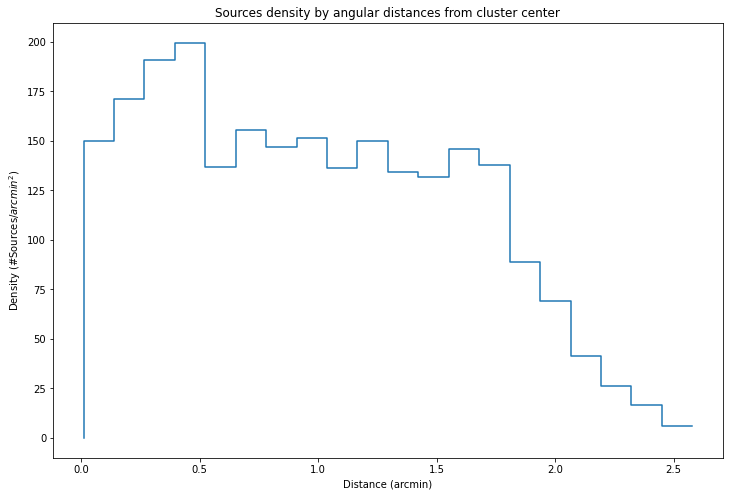

In [ ]:
cluster = pd.read_excel("/content/PLCKG171 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

rx = 2548.5
ry = 2462.6
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

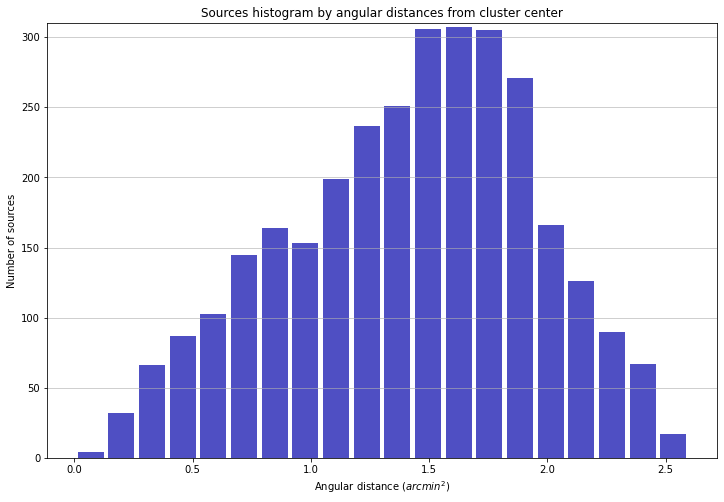

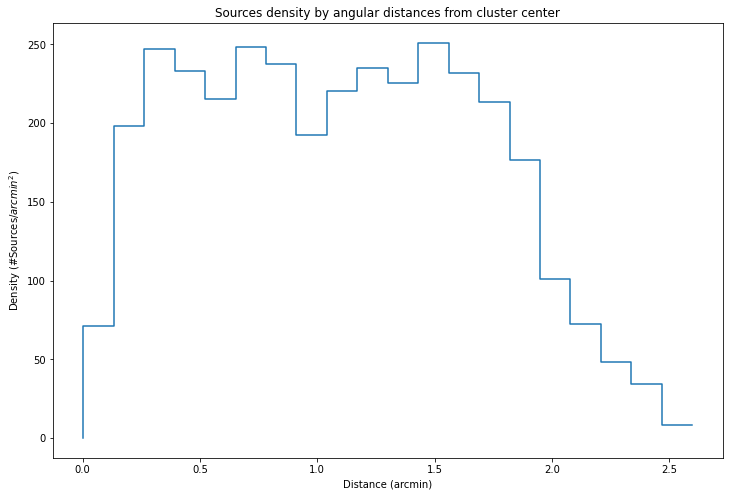

In [ ]:
cluster = pd.read_excel("/content/RXC2211 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

rx = 2443.4
ry = 2527.4
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

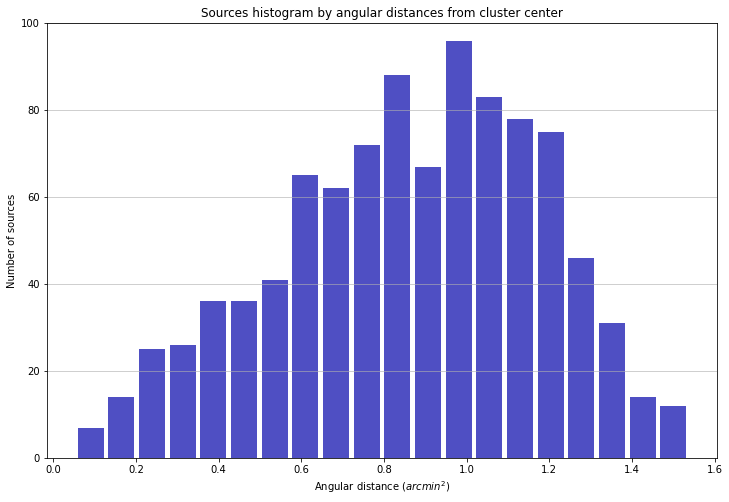

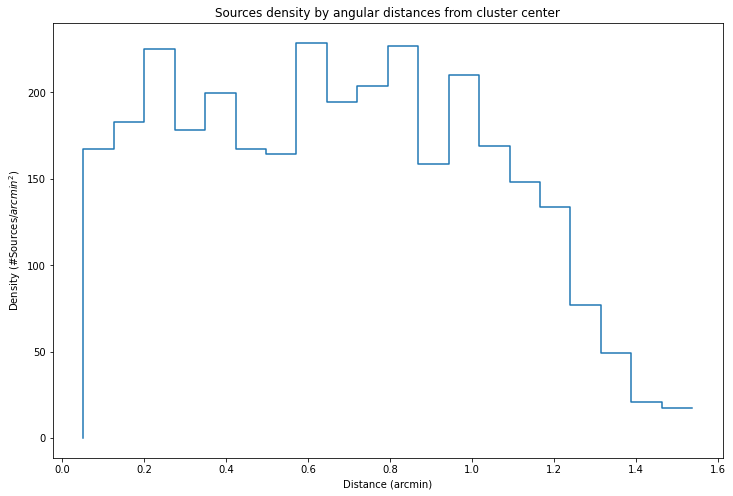

In [ ]:
cluster = pd.read_excel("/content/RXC1514 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

rx = 2612.4
ry = 2420.5
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

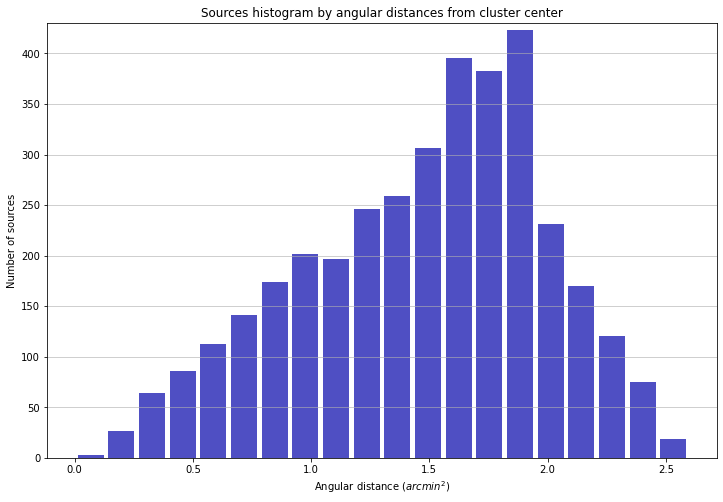

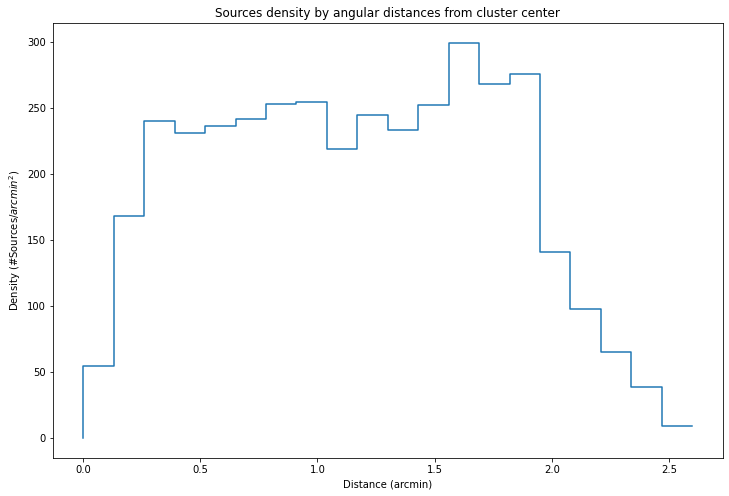

In [ ]:
cluster = pd.read_excel("/content/RXC0142 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

rx = 2428.8
ry = 2523.4
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

[1.99173770e-05 5.49149771e-02 1.60640519e-01 2.66366060e-01
 3.72091602e-01 4.77817143e-01 5.83542685e-01 6.89268226e-01
 7.94993768e-01 9.00719309e-01 1.00644485e+00 1.11217039e+00
 1.21789593e+00 1.32362148e+00 1.42934702e+00 1.53507256e+00
 1.64079810e+00 1.74652364e+00 1.85224918e+00 1.95797472e+00
 2.06370027e+00]
[0.05491498 0.16064052 0.26636606 0.3720916  0.47781714 0.58354268
 0.68926823 0.79499377 0.90071931 1.00644485 1.11217039 1.21789593
 1.32362148 1.42934702 1.53507256 1.6407981  1.74652364 1.85224918
 1.95797472 2.06370027]


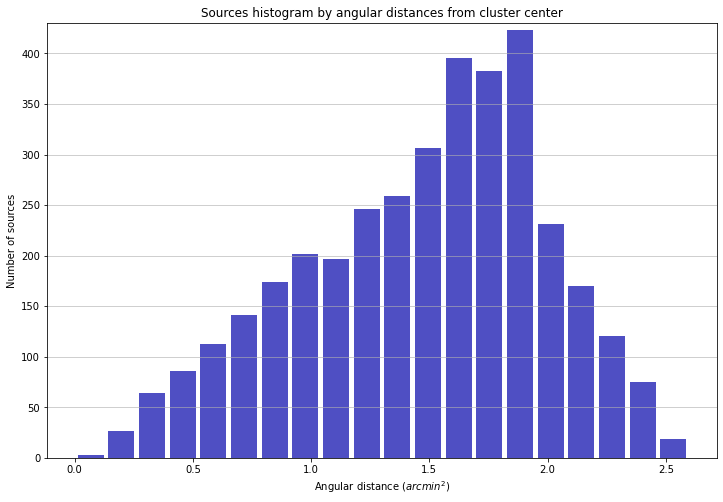

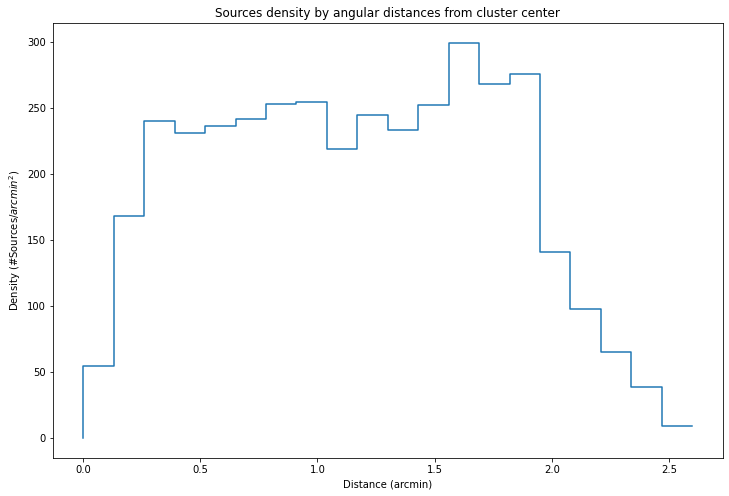

In [ ]:
cluster = pd.read_excel("/content/RXC0142 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

rx = 2428.8
ry = 2523.4
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)

for i in range (21):
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    area[i] = np.pi * (bins[i]**2 - bins[i-1]**2)

area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

In [ ]:
print(bins)
print(area)

[2.51791541e-03 1.32235850e-01 2.61953784e-01 3.91671719e-01
 5.21389654e-01 6.51107588e-01 7.80825523e-01 9.10543457e-01
 1.04026139e+00 1.16997933e+00 1.29969726e+00 1.42941520e+00
 1.55913313e+00 1.68885106e+00 1.81856900e+00 1.94828693e+00
 2.07800487e+00 2.20772280e+00 2.33744074e+00 2.46715867e+00
 2.59687661e+00]
[1.99173770e-05 5.49149771e-02 1.60640519e-01 2.66366060e-01
 3.72091602e-01 4.77817143e-01 5.83542685e-01 6.89268226e-01
 7.94993768e-01 9.00719309e-01 1.00644485e+00 1.11217039e+00
 1.21789593e+00 1.32362148e+00 1.42934702e+00 1.53507256e+00
 1.64079810e+00 1.74652364e+00 1.85224918e+00 1.95797472e+00
 2.06370027e+00]


In [3]:
def create_borders(TL, TR, BL, BR): #Assuming bottom corners tilted righter than top corners
  global m_1
  m_1 = (TR[1]-TL[1])/(TR[0]-TL[0]) # Top line
  global b_1
  b_1 = TR[1] - m_1 * TR[0]
  def TopY(x):
    return x*m_1 + b_1
  def TopX(y):
    return (y-b_1)/m_1

  global m_2
  m_2 = (BR[1]-BL[1])/(BR[0]-BL[0]) # Bottom line
  global b_2
  b_2 = BR[1] - m_2 * BR[0]
  def BottomY(x):
    return x*m_2 + b_2
  def BottomX(y):
    return (y-b_2)/m_2
  

  global m_3
  m_3 = (BL[1]-TL[1])/(BL[0]-TL[0]) # Left line
  global b_3
  b_3 = BL[1] - m_3 * BL[0]
  def LeftY(x):
    return x*m_3 + b_3
  def LeftX(y):
    return (y-b_3)/m_3

  global m_4
  m_4 = (BR[1]-TR[1])/(BR[0]-TR[0]) # Right line
  global b_4
  b_4 = TR[1] - m_4 * TR[0]
  def RightY(x):
    return x*m_4 + b_4
  def RightX(y):
    return (y-b_4)/m_4

In [4]:
def arc_length_cut_by_line(a, b, center, radius):
    x_center, y_center = center
    angles = np.linspace(0, 2 * np.pi, 10000)
    x = x_center + radius * np.cos(angles)
    y = y_center + radius * np.sin(angles)
    x_cut = x[(y >= a * x + b) & (y <= a * x + b + 150)]
    if x_cut.size == 0:
      #print("Dumbass, no cut for:","radius:", radius, "a:",a, "b:",b)
      return 0, 0, 2 * np.pi
    y_cut = a * x_cut + b
    d = np.sqrt((x_cut - x_center) ** 2 + (y_cut - y_center) ** 2)
    angle_cut = np.arccos((x_cut - x_center) / d)
    angle_cut[y_cut < y_center] = 2 * np.pi - angle_cut[y_cut < y_center]
    angle_cut = np.sort(angle_cut)
    start_angle = angle_cut[0]
    end_angle = angle_cut[-1]
    arc_length = radius * (end_angle - start_angle)
    return start_angle, end_angle, arc_length

In [5]:
def arc_calculation(t1,t2,t3,t4,t5,t6,t7,t8): #Order of inputs: T, L, B, R
  if t7 == 0 and t8 == 0:
    arc = 2*np.pi - (t2-t1) - (t4-t3) - (t6-t5) - (t8-t7)
  else:
    arc = 2*np.pi - (t2-t1) - (t4-t3) - (t6-t5) - (2*np.pi-t7+t8)

  if t1 < t8 and t1 != 0 and t8 !=0:
    arc = arc + (t8-t1)
  if t2 > t3 and t2 != 0 and t3 !=0:
    arc = arc + (t2-t3)
  if t4 > t5 and t4 != 0 and t5 !=0:
    arc = arc + (t4-t5)
  if t6 > t7 and t6 != 0 and t7 !=0:
    arc = arc + (t6-t7)
  return arc

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

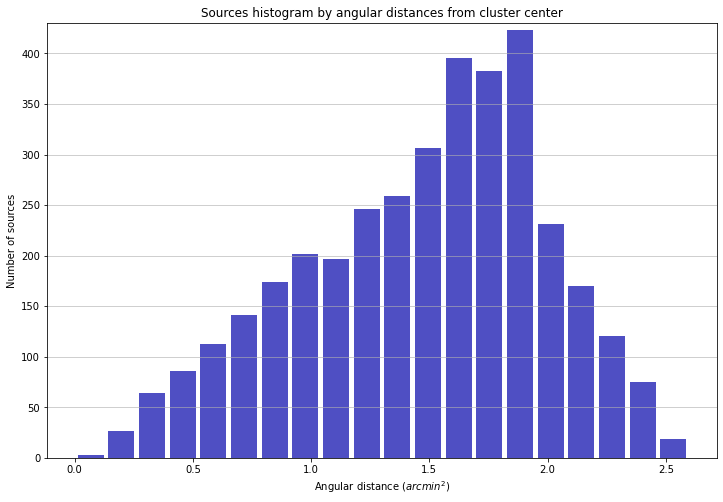

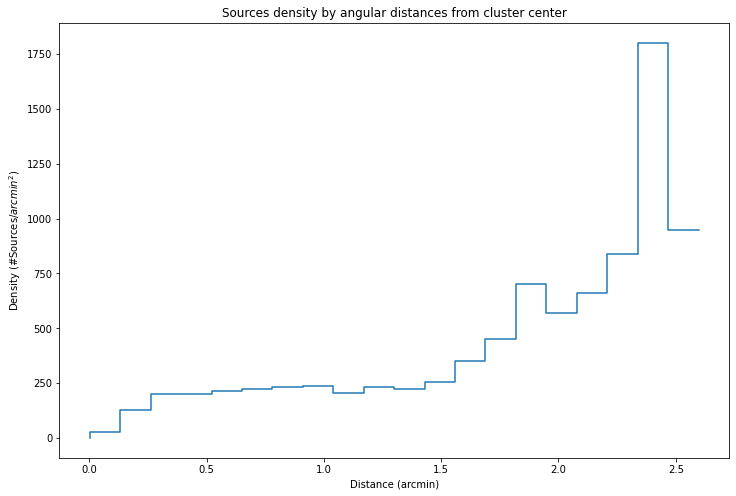

In [6]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/RXC0142 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([617.8,4218.8])
BL = np.array([864.2,885.6])
TR = np.array([4210.1,4210.5])
BR = np.array([4392.2,781.9])
Center = np.array([2428.8,2523.4])

create_borders(TL, TR, BL, BR)
####

rx = 2428.8
ry = 2523.4
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])

    arc = arc_calculation(Top_start_angle, Top_end_angle,Left_start_angle, Left_end_angle,Bottom_start_angle, Bottom_end_angle,Right_start_angle, Right_end_angle)
    area[i] = arc * bins[i] * Delta


area1 = area[1:]
area1[19] = 0.02  #fixing singularity
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

In [ ]:
arc=np.zeros(20)
for i in range (20):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])

    arc[i] = arc_calculation(Top_start_angle, Top_end_angle,Left_start_angle, Left_end_angle,Bottom_start_angle, Bottom_end_angle,Right_start_angle, Right_end_angle)
print("arcs:",arc)

arcs: [0.         6.28318531 6.28318531 6.28318531 6.28318531 6.28318531
 6.28318531 6.28318531 6.28318531 6.28318531 6.28318531 6.28318531
 5.94997341 5.15799787 3.61141239 2.391644   1.50382442 0.8952302
 0.47673459 0.13007427]


<ipython-input-29-e7b91005c9e1>:58: RuntimeWarning: divide by zero encountered in true_divide
  density = n/area1


Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

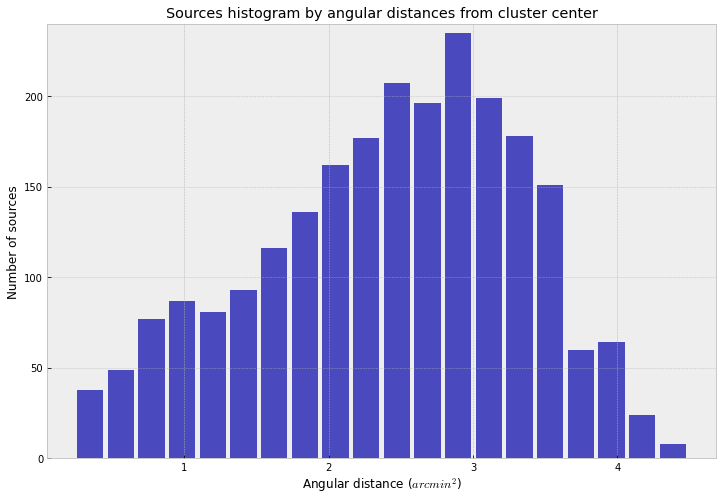

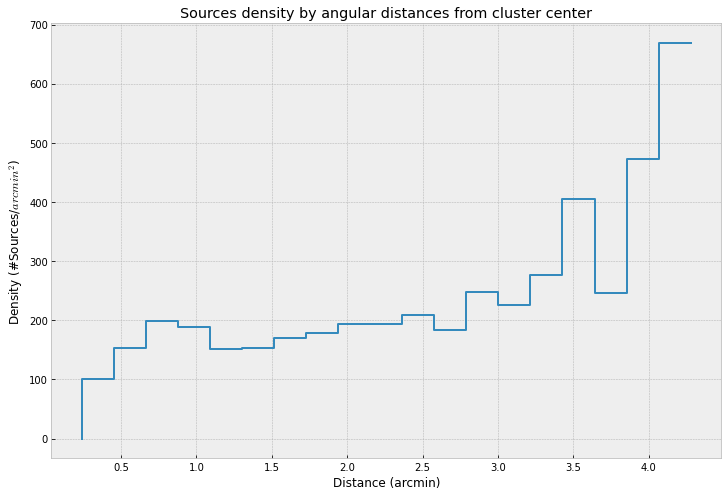

In [ ]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/A697 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([123.3,3398.7])
BL = np.array([1538,286.2])
TR = np.array([3407.4,4594.9])
BR = np.array([4886.5,1608.7])
Center = np.array([2840.7,4594.9])

create_borders(TL, TR, BL, BR)
####

rx = 2840.7
ry = 4594.9
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])

    arc = arc_calculation(Top_start_angle, Top_end_angle,Left_start_angle, Left_end_angle,Bottom_start_angle, Bottom_end_angle,Right_start_angle, Right_end_angle)
    area[i] = arc * bins[i] * Delta


area1 = area[1:]
#area1[19] = 0.02  #fixing singularity
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

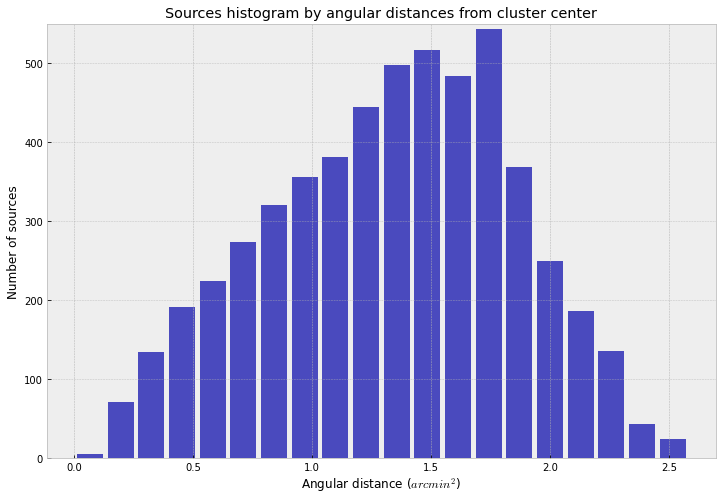

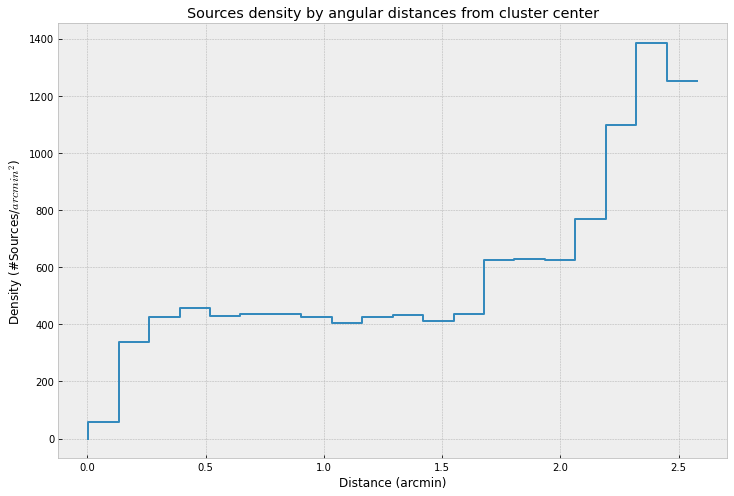

In [ ]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/PLCKG00419 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([821,4413])
BL = np.array([695,1082])
TR = np.array([4388,3985])
BR = np.array([4168.3,593])
Center = np.array([2466.4,2584])

create_borders(TL, TR, BL, BR)
####

rx = 2466.4
ry = 2584
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])

    arc = arc_calculation(Top_start_angle, Top_end_angle,Left_start_angle, Left_end_angle,Bottom_start_angle, Bottom_end_angle,Right_start_angle, Right_end_angle)
    area[i] = arc * bins[i] * Delta


area1 = area[1:]
area1[19] = 0.02  #fixing singularity
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

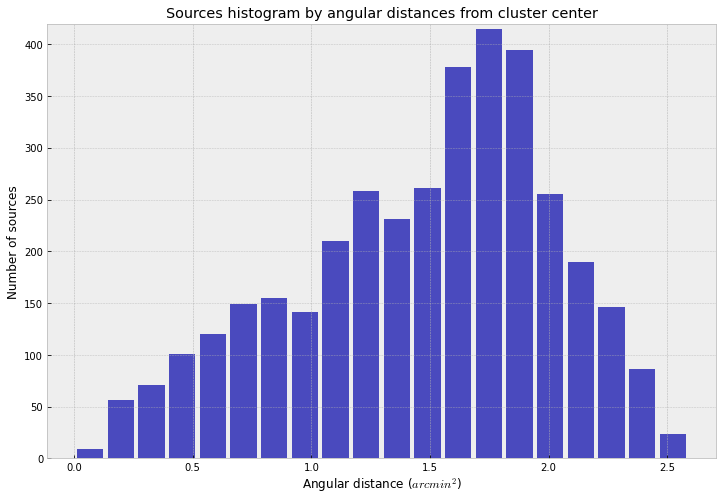

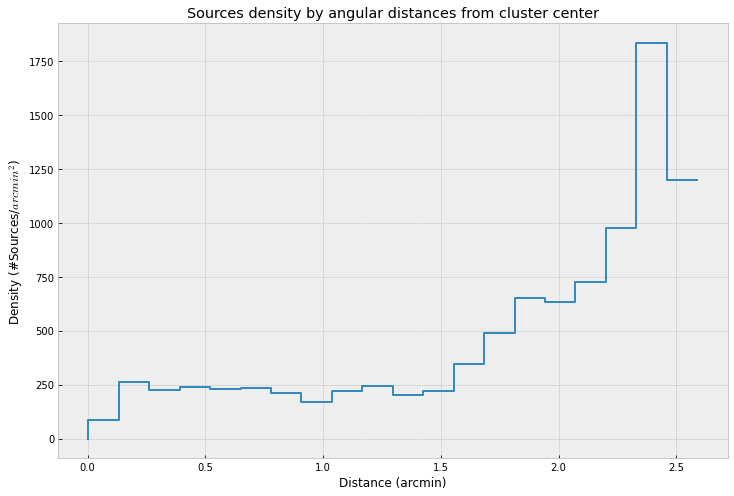

In [ ]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/PLCKG13810 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([320,3809])
BL = np.array([1217,605])
TR = np.array([3834,4514])
BR = np.array([4673,1199])
Center = np.array([2432.5,2503])

create_borders(TL, TR, BL, BR)
####

rx = 2432.5
ry = 2503
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])

    arc = arc_calculation(Top_start_angle, Top_end_angle,Left_start_angle, Left_end_angle,Bottom_start_angle, Bottom_end_angle,Right_start_angle, Right_end_angle)
    area[i] = arc * bins[i] * Delta


area1 = area[1:]
area1[19] = 0.02  #fixing singularity
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

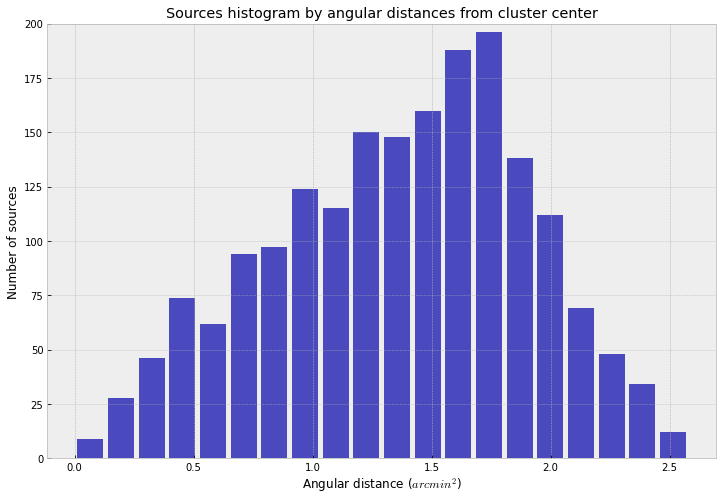

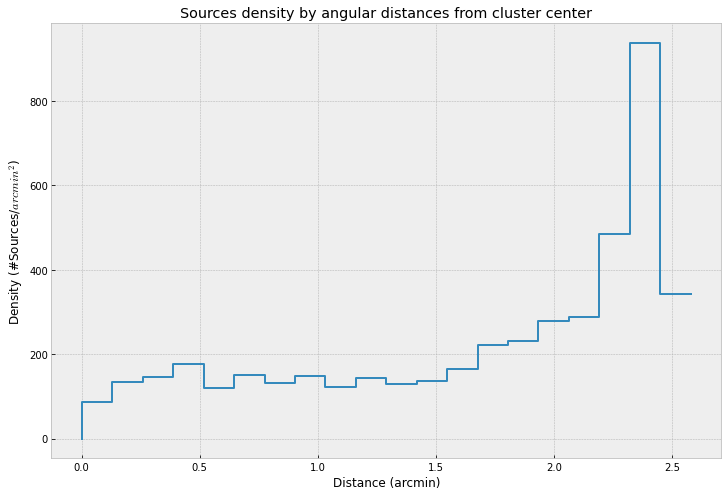

In [ ]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/PLCKG171 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([799,4373])
BL = np.array([617,1003])
TR = np.array([4287,3934])
BR = np.array([4191,617])
Center = np.array([2556,2470])

create_borders(TL, TR, BL, BR)
####

rx = 2556
ry = 2470
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])

    arc = arc_calculation(Top_start_angle, Top_end_angle,Left_start_angle, Left_end_angle,Bottom_start_angle, Bottom_end_angle,Right_start_angle, Right_end_angle)
    area[i] = arc * bins[i] * Delta


area1 = area[1:]
area1[19] = 0.035  #fixing singularity
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

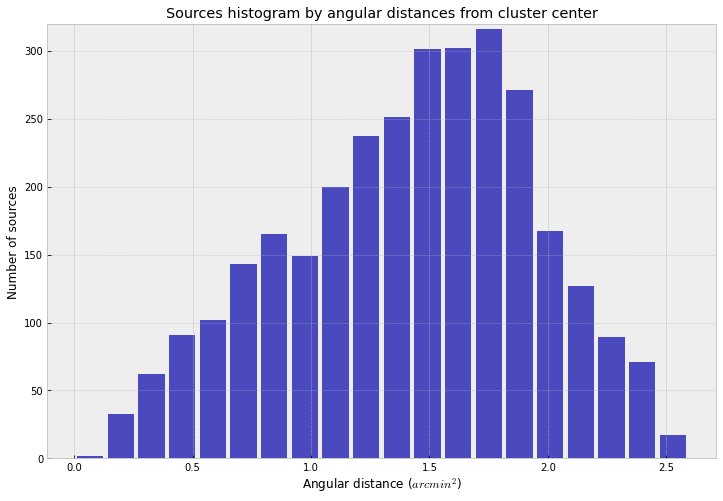

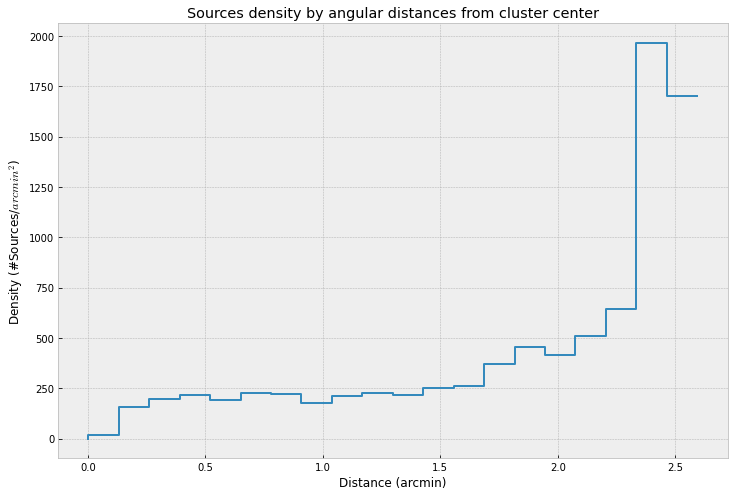

In [ ]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/RXC2211 data.xlsx") ###### TWO SQUARES #######

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([639,4212])
BL = np.array([864,885])
TR = np.array([4202,4212])
BR = np.array([4405,789])
Center = np.array([2446,2523])

create_borders(TL, TR, BL, BR)
####

rx = 2446
ry = 2523
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])

    arc = arc_calculation(Top_start_angle, Top_end_angle,Left_start_angle, Left_end_angle,Bottom_start_angle, Bottom_end_angle,Right_start_angle, Right_end_angle)
    area[i] = arc * bins[i] * Delta


area1 = area[1:]
area1[19] = 0.01  #fixing singularity
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

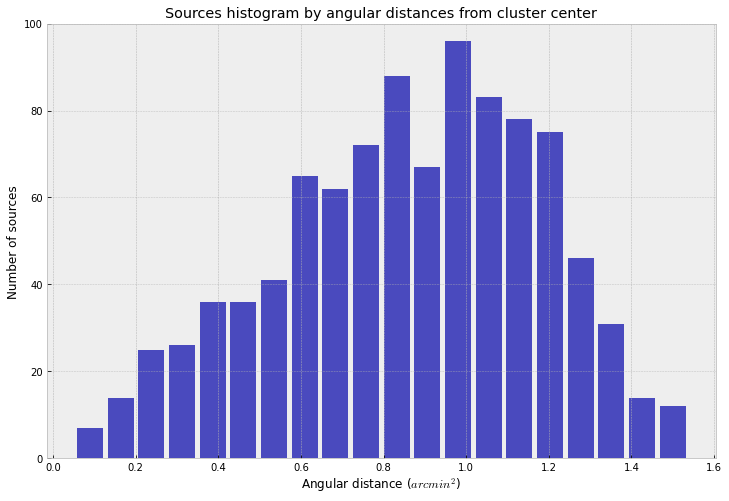

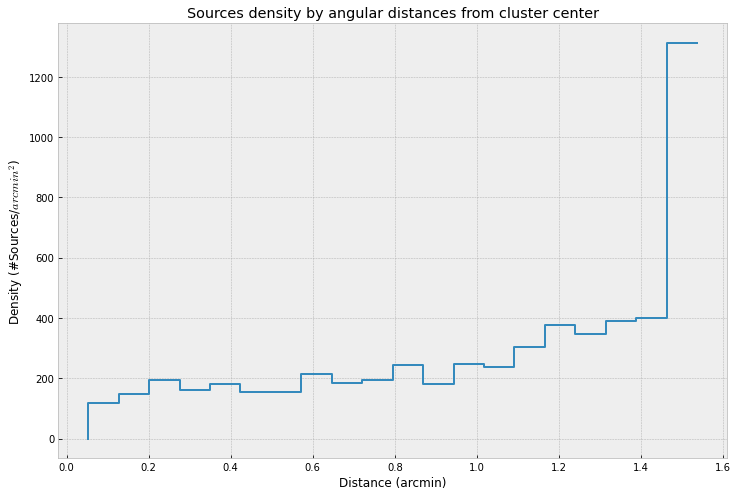

In [ ]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/RXC1514 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([1754,3716])
BL = np.array([1218,1775])
TR = np.array([3978,3131])
BR = np.array([3502,1236])
Center = np.array([2612.4,2420.5])

create_borders(TL, TR, BL, BR)
####

rx = 2612.4
ry = 2420.5
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])

    arc = arc_calculation(Top_start_angle, Top_end_angle,Left_start_angle, Left_end_angle,Bottom_start_angle, Bottom_end_angle,Right_start_angle, Right_end_angle)
    area[i] = arc * bins[i] * Delta


area1 = area[1:]
#area1[19] = 0.01  #fixing singularity
density = n/area1

density1 = np.append(0,density)
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

In [ ]:
########################################################################################################################################## Cutting off #############

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

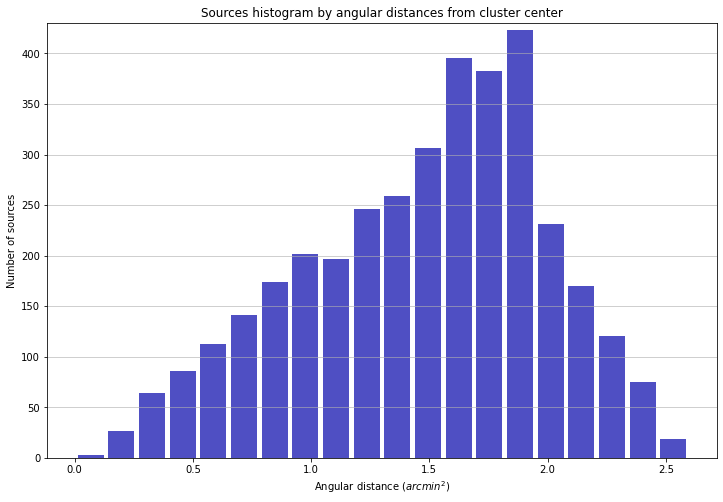

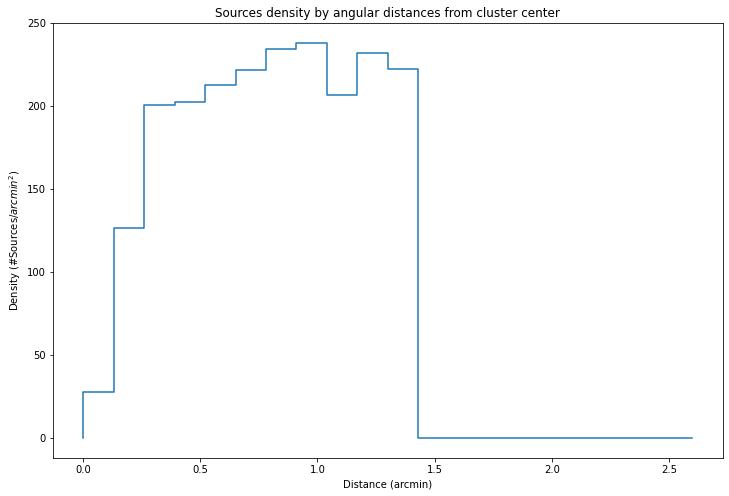

In [7]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/RXC0142 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([617.8,4218.8])
BL = np.array([864.2,885.6])
TR = np.array([4210.1,4210.5])
BR = np.array([4392.2,781.9])
Center = np.array([2428.8,2523.4])

create_borders(TL, TR, BL, BR)
####

rx = 2428.8
ry = 2523.4
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])
    if Top_arc == 2*np.pi and Bottom_arc == 2*np.pi and Left_arc == 2*np.pi and Right_arc == 2*np.pi:
      area[i] = Delta * bins[i] * 2*np.pi
    else:
      area[i] = 1000000


area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
density_RXC0142 = density1
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

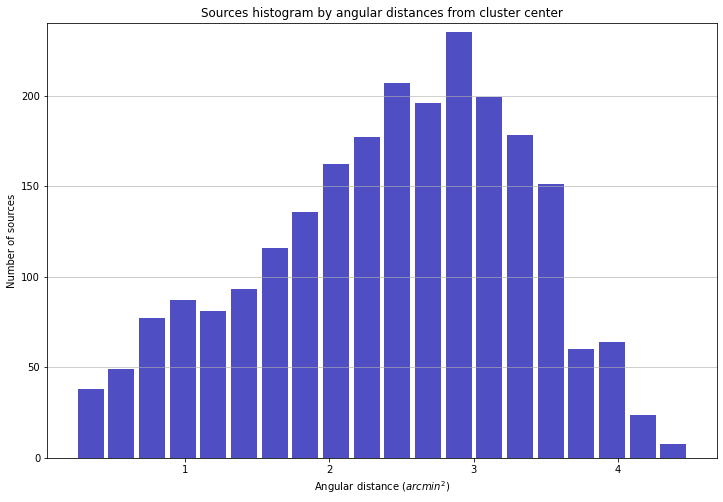

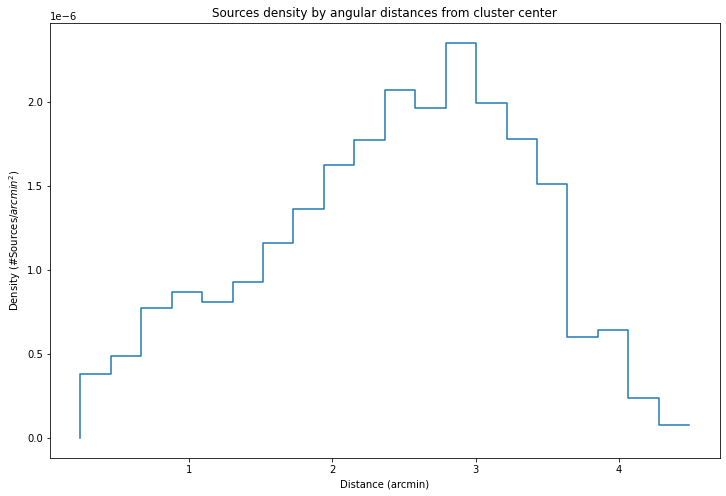

In [8]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/A697 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([123.3,3398.7])
BL = np.array([1538,286.2])
TR = np.array([3407.4,4594.9])
BR = np.array([4886.5,1608.7])
Center = np.array([2840.7,4594.9])

create_borders(TL, TR, BL, BR)
####

rx = 2840.7
ry = 4594.9
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])
    if Top_arc == 2*np.pi and Bottom_arc == 2*np.pi and Left_arc == 2*np.pi and Right_arc == 2*np.pi:
      area[i] = Delta * bins[i] * 2*np.pi
    else:
      area[i] = 100000000


area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
density_A697 = density1
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

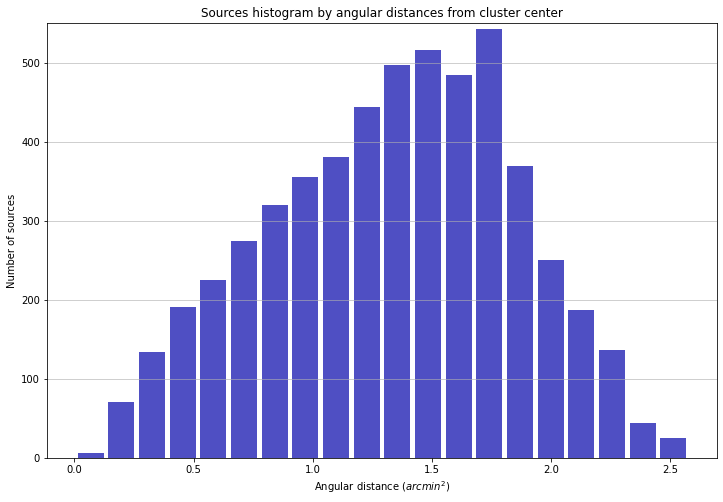

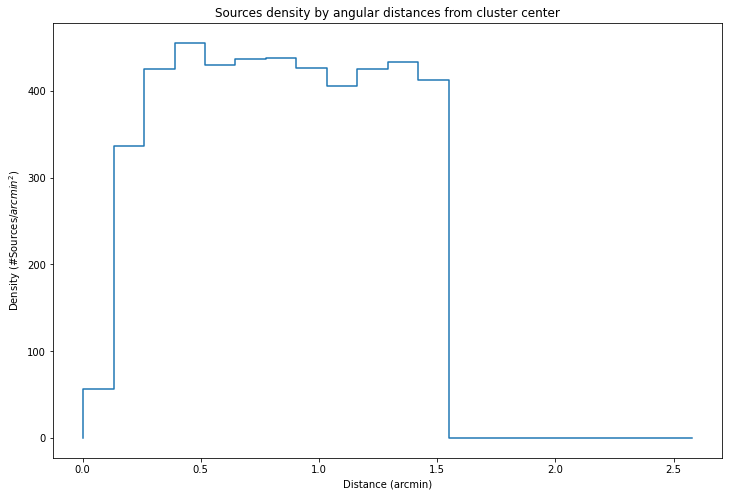

In [9]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/PLCKG00419 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([821,4413])
BL = np.array([695,1082])
TR = np.array([4388,3985])
BR = np.array([4168.3,593])
Center = np.array([2466.4,2584])

create_borders(TL, TR, BL, BR)
####

rx = 2466.4
ry = 2584
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])
    if Top_arc == 2*np.pi and Bottom_arc == 2*np.pi and Left_arc == 2*np.pi and Right_arc == 2*np.pi:
      area[i] = Delta * bins[i] * 2*np.pi
    else:
      area[i] = 100000000


area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
density_PLCKG00419 = density1
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

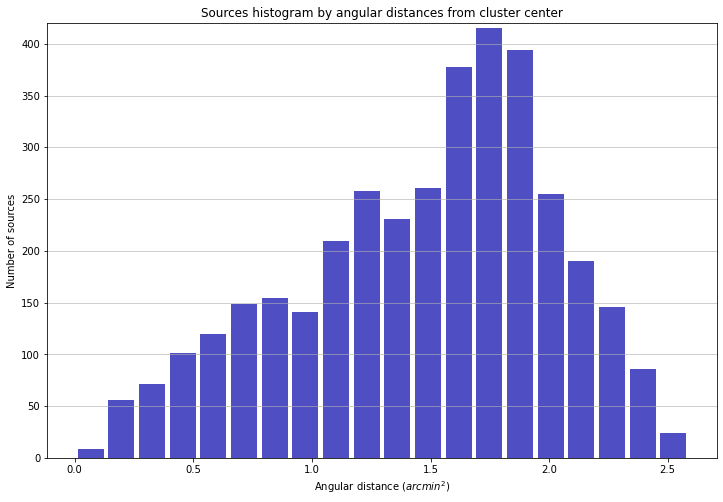

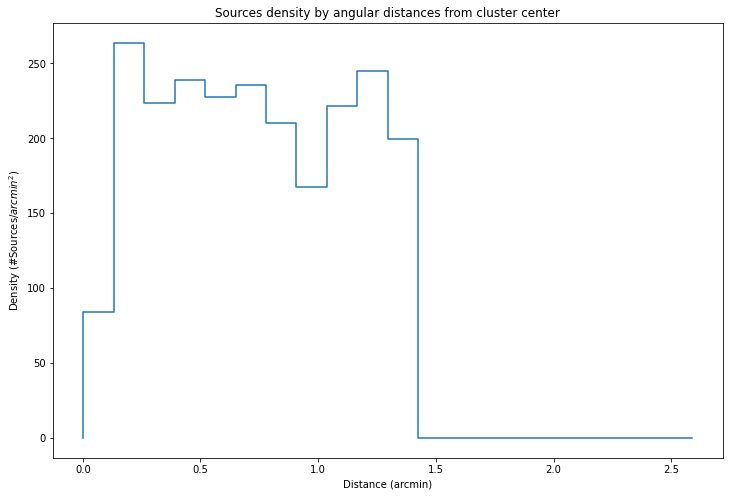

In [10]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/PLCKG13810 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([320,3809])
BL = np.array([1217,605])
TR = np.array([3834,4514])
BR = np.array([4673,1199])
Center = np.array([2432.5,2503])

create_borders(TL, TR, BL, BR)
####

rx = 2432.5
ry = 2503
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])
    if Top_arc == 2*np.pi and Bottom_arc == 2*np.pi and Left_arc == 2*np.pi and Right_arc == 2*np.pi:
      area[i] = Delta * bins[i] * 2*np.pi
    else:
      area[i] = 100000000


area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
density_PLCKG13810 = density1
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

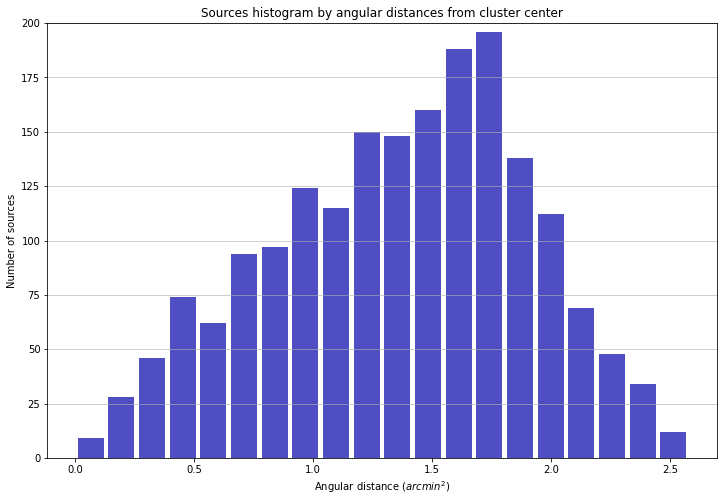

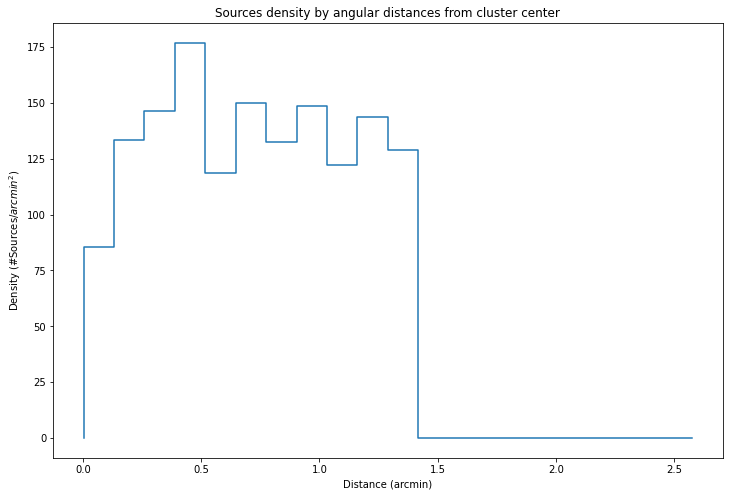

In [11]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/PLCKG171 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([799,4373])
BL = np.array([617,1003])
TR = np.array([4287,3934])
BR = np.array([4191,617])
Center = np.array([2556,2470])

create_borders(TL, TR, BL, BR)
####

rx = 2556
ry = 2470
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])
    if Top_arc == 2*np.pi and Bottom_arc == 2*np.pi and Left_arc == 2*np.pi and Right_arc == 2*np.pi:
      area[i] = Delta * bins[i] * 2*np.pi
    else:
      area[i] = 100000000


area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
density_PLCKG171 = density1
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

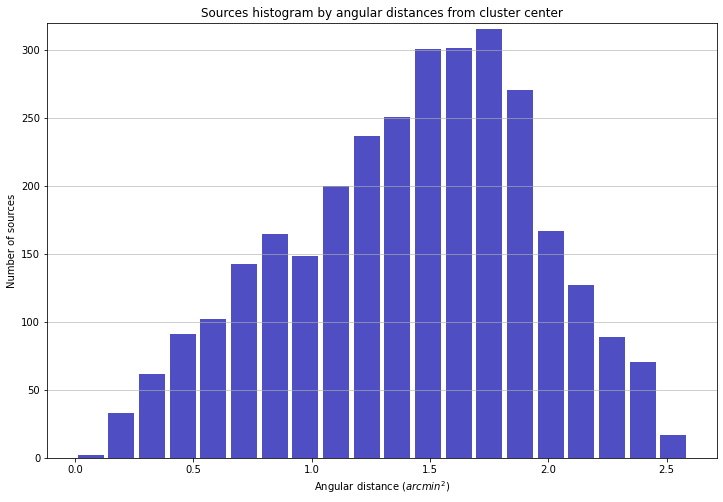

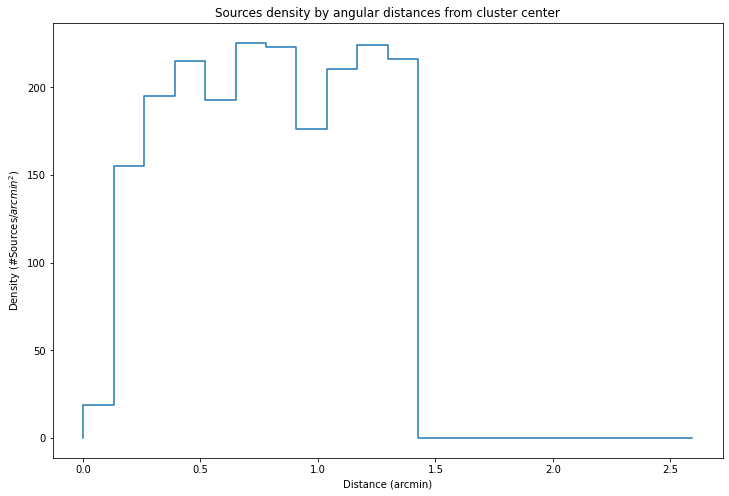

In [12]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/RXC2211 data.xlsx") ###### TWO SQUARES #######

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([639,4212])
BL = np.array([864,885])
TR = np.array([4202,4212])
BR = np.array([4405,789])
Center = np.array([2446,2523])

create_borders(TL, TR, BL, BR)
####

rx = 2446
ry = 2523
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])
    if Top_arc == 2*np.pi and Bottom_arc == 2*np.pi and Left_arc == 2*np.pi and Right_arc == 2*np.pi:
      area[i] = Delta * bins[i] * 2*np.pi
    else:
      area[i] = 100000000


area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
density_RXC2211 = density1
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

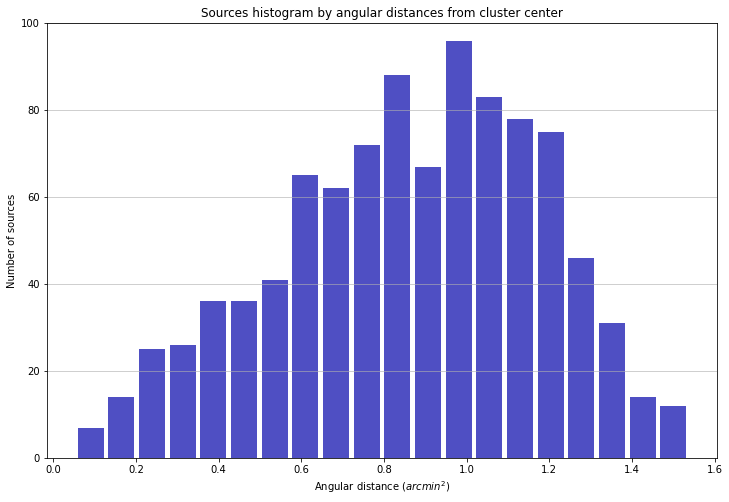

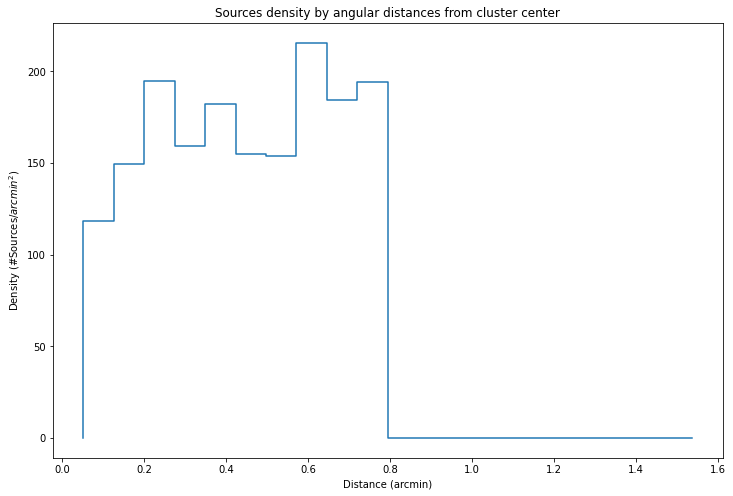

In [13]:
from astropy.io.fits.file import MEMMAP_MODES
cluster = pd.read_excel("/content/RXC1514 data.xlsx")

xc = cluster["x"]
yc = cluster["y"]

####
TL = np.array([1754,3716])
BL = np.array([1218,1775])
TR = np.array([3978,3131])
BR = np.array([3502,1236])
Center = np.array([2612.4,2420.5])

create_borders(TL, TR, BL, BR)
####

rx = 2612.4
ry = 2420.5
radius = []
for i in range(0,len(xc)):
  k = math.sqrt((xc[i]-rx)**2+(yc[i]-ry)**2)
  m = k/1000
  radius.append(m)

# An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(x=radius, bins=20, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Angular distance ($arcmin^2$)')
plt.ylabel('Number of sources')
plt.title('Sources histogram by angular distances from cluster center')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


area = np.zeros(21)


for i in range (21):
  Delta = bins[i]-bins[i-1]
  if i == 0:
    area[i] = np.pi * bins[i]**2
  else:
    Top_start_angle, Top_end_angle, Top_arc = arc_length_cut_by_line(m_1, b_1, Center, 1000*bins[i])
    Bottom_start_angle, Bottom_end_angle, Bottom_arc = arc_length_cut_by_line(m_2, b_2, Center, 1000*bins[i])
    Left_start_angle, Left_end_angle, Left_arc = arc_length_cut_by_line(m_3, b_3, Center, 1000*bins[i])
    Right_end_angle, Right_start_angle, Right_arc = arc_length_cut_by_line(m_4, b_4, Center, 1000*bins[i])
    if Top_arc == 2*np.pi and Bottom_arc == 2*np.pi and Left_arc == 2*np.pi and Right_arc == 2*np.pi:
      area[i] = Delta * bins[i] * 2*np.pi
    else:
      area[i] = 100000000


area1 = area[1:]
density = n/area1

density1 = np.append(0,density)
density_RXC1514 = density1
plt.figure(figsize=(12,8))
plt.step(bins, density1)
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#Sources/$arcmin^2$)')
plt.title('Sources density by angular distances from cluster center')

In [ ]:
print(density_RXC1514)
print(density_RXC2211)
print(density_RXC0142)
print(density_PLCKG171)
print(density_PLCKG13810)
print(density_PLCKG00419)
print(density_A697)
print("average:" ,density_average)

[0.00000000e+00 1.18290746e+02 1.49291117e+02 1.94739245e+02
 1.59531636e+02 1.82207109e+02 1.55053686e+02 1.53685876e+02
 2.15675842e+02 1.84535619e+02 1.94290670e+02 8.80000000e-07
 6.70000000e-07 9.60000000e-07 8.30000000e-07 7.80000000e-07
 7.50000000e-07 4.60000000e-07 3.10000000e-07 1.40000000e-07
 1.20000000e-07]
[0.00000000e+00 1.87004733e+01 1.55362918e+02 1.95052813e+02
 2.14967725e+02 1.92898282e+02 2.25469250e+02 2.23066553e+02
 1.76300839e+02 2.10392766e+02 2.24419119e+02 2.16096803e+02
 3.01000000e-06 3.02000000e-06 3.16000000e-06 2.71000000e-06
 1.67000000e-06 1.27000000e-06 8.90000000e-07 7.10000000e-07
 1.70000000e-07]
[0.00000000e+00 2.78350593e+01 1.26461752e+02 2.00483145e+02
 2.02374668e+02 2.12934383e+02 2.21556869e+02 2.34459955e+02
 2.38247853e+02 2.06589453e+02 2.32227160e+02 2.22311268e+02
 3.07000000e-04 3.96000000e-04 3.83000000e-04 4.23000000e-04
 2.31000000e-04 1.70000000e-04 1.21000000e-04 7.50000000e-05
 1.90000000e-05]
[0.00000000e+00 8.54896975e+01 1.3

In [14]:
density_average = np.zeros(21)
for i in range(0,20):
  x = 0
  sum = 0
  if density_RXC1514[i] > 5:
    sum = sum + density_RXC1514[i]
    x = x + 1
  if density_RXC2211[i] > 5:
    sum = sum + density_RXC2211[i]
    x = x + 1
  if density_RXC0142[i] > 5:
    sum = sum + density_RXC0142[i]
    x = x + 1
  if density_PLCKG171[i] > 5:
    sum = sum + density_PLCKG171[i]
    x = x + 1
  if density_PLCKG13810[i] > 5:
    sum = sum + density_PLCKG13810[i]
    x = x + 1
  if density_PLCKG00419[i] > 5:
    sum = sum + density_PLCKG00419[i]
    x = x + 1
  if density_A697[i] > 5:
    sum = sum + density_A697[i]
    x = x + 1
  if x == 0:
    density_average[i] = 0
  else:
    density_average[i] = sum / x

print("average:",density_average)

average: [  0.          65.05376076 194.16309769 230.97028222 241.42941641
 227.36546842 237.39376183 231.91902356 228.67207818 225.16144858
 244.18237261 239.95861587 412.08946111   0.           0.
   0.           0.           0.           0.           0.
   0.        ]


Text(0.5, 1.0, 'Sources density by angular distances from cluster center')

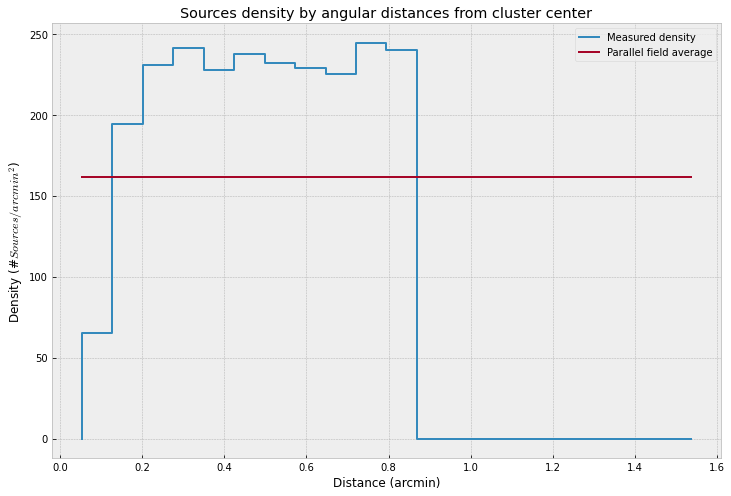

In [15]:
density_average[12] = 0 #Average by a single value
plt.figure(figsize=(12,8))
plt.style.use('bmh')
average_den = np.ones(21) * 161.45
plt.step(bins, density_average, label='Measured density')
plt.step(bins, average_den, label='Parallel field average')
plt.legend()
plt.xlabel('Distance (arcmin)')
plt.ylabel('Density (#$Sources/arcmin^2$)')
plt.title('Sources density by angular distances from cluster center') 
# Plot average red line with value of 161.45

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:

sub = density_average - average_den
div = density_average / average_den
print("sub:",sub)
print("div:", div)

sub: [-161.45        -96.39623924   32.71309769   69.52028222   79.97941641
   65.91546842   75.94376183   70.46902356   67.22207818   63.71144858
   82.73237261   78.50861587 -161.45       -161.45       -161.45
 -161.45       -161.45       -161.45       -161.45       -161.45
 -161.45      ]
div: [0.         0.40293441 1.20262061 1.43059946 1.49538195 1.40827172
 1.47038564 1.43647584 1.41636468 1.39462031 1.5124334  1.48627201
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [60]:
def uncertainty(x):
  sum=0
  for i in range(0,len(x)):
    sum += x[i]
  x_av = sum / len(x)

  sig=0
  for i in range(0,len(x)):
    m = (x[i] - x_av)**2
    sig += m
  sigma = math.sqrt(sig/(len(x)-1))

  alpha = sigma / math.sqrt(len(x))

  return x_av, sigma, alpha

In [61]:
taut = density_average[4:12]
average, sigma, alpha = uncertainty(taut)
print("The measurement is:", average, "p/m", alpha, "with sigma", sigma)

The measurement is: 234.5102731820424 p/m 2.5307778565291783 with sigma 7.15812073611415


In [42]:
print(taut)
print(len(taut))

[241.42941641 227.36546842 237.39376183 231.91902356 228.67207818
 225.16144858 244.18237261 239.95861587]
8


In [75]:
chand = [10,2,3,11,13,11,7,2,13,4,1,0,0,2,6,1,9,1,2]
average, sigma, alpha = uncertainty(chand)
print("The measurement is:", average, "p/m", alpha, "with sigma", sigma)

The measurement is: 5.157894736842105 p/m 1.0603518060534438 with sigma 4.6219663671878015
